In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [9]:
# Feature engineering
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [10]:
pd.get_dummies(X['Geography'], drop_first=True)

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [11]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [12]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [13]:
X.drop(['Geography', 'Gender'], axis=1)
# axis=1 because we want to drop the columns not rows

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [15]:
# Concatinate columns in data
pd.concat([X, geography, gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
X = pd.concat([X, geography, gender], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# to avoid data linkage(fit transform and transform is used)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
from tensorflow.keras.models import Sequential
# model for forward and backward propagation

from tensorflow.keras.layers import Dense
# used to make layers(nodes for the network(the circles))

from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU

from tensorflow.keras.layers import Dropout
# to avoid overfitting(high acc with train data while low with test data) we introduce dropout layer
# it used like regulation in ml(L1 Norm, L2 Norm)
# if dropout is 0.3 that means 30% of neurons will be deactivated while testing(randomly)
# where the neuron is deactivated its link is also removed

In [26]:
X_train.shape
# the model will have 11 inputs

(8000, 11)

In [27]:
ANN = Sequential()

In [28]:
# Input layer
ANN.add(Dense(units=11, activation='relu'))
# relu will applied to next sequencial layer

In [29]:
# 1st hidden layer
ANN.add(Dense(units=7, activation='relu'))

In [30]:
# 2nd hidden layer
ANN.add(Dense(units=6, activation='relu'))

In [31]:
# Output layer
ANN.add(Dense(units=1, activation='sigmoid'))

In [49]:
ANN.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])
# by default learning rate = 0.1

In [64]:
# for user learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [51]:
# ANN.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
# Early stopping
early_stopping= tf.keras.callbacks.EarlyStopping(
                         monitor= 'val_loss',
                         min_delta= 0.0001,
                         patience= 20,
                         verbose= 1, 
                         mode= 'auto',
                         baseline= None,
                         restore_best_weights= False
                         )

In [53]:
model_history = ANN.fit(X_train, y_train, validation_split=0.33,
                        batch_size=10, epochs=1000, 
                        callbacks= early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8762 - loss: 0.3056 - val_accuracy: 0.8455 - val_loss: 0.3913
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8767 - loss: 0.3079 - val_accuracy: 0.8470 - val_loss: 0.3974
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8716 - loss: 0.3082 - val_accuracy: 0.8470 - val_loss: 0.3937
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8792 - loss: 0.2972 - val_accuracy: 0.8451 - val_loss: 0.3945
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8770 - loss: 0.3031 - val_accuracy: 0.8440 - val_loss: 0.3959
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8714 - loss: 0.3062 - val_accuracy: 0.8448 - val_loss: 0.3941
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8832 - loss: 0.2897 - val_accuracy: 0.8455 - val_loss: 0.3930
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8865 - loss: 0.2967 - 

In [54]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

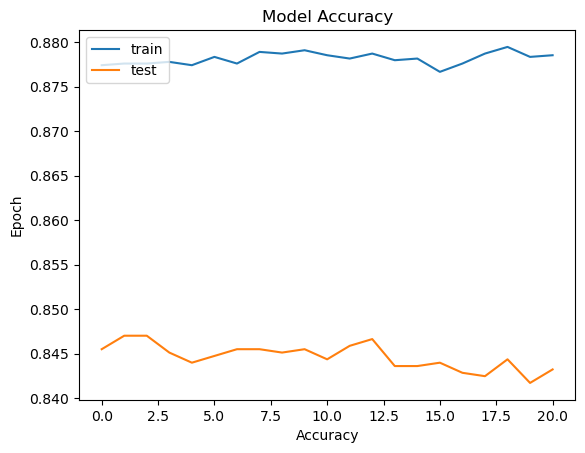

In [55]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

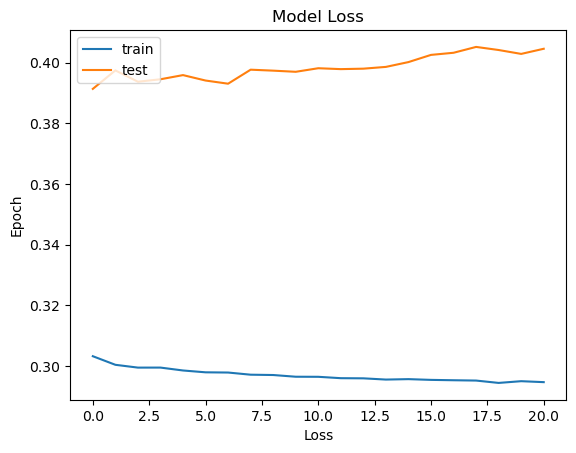

In [56]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
y_pred = ANN.predict(X_test)
y_pred = (y_pred >= 0.5)
# >=0.5 == 1 else 0
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 208,  197]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.86

In [70]:
# Get the weightes
# ANN.get_weights()

In [63]:
ANN2 = Sequential()
ANN2.add(Dense(units=11, activation='relu'))
ANN2.add(Dense(units=7, activation='relu'))
ANN2.add(Dropout(0.3))
ANN2.add(Dense(units=1, activation='sigmoid'))

In [65]:
ANN2.compile(optimizer=opt, loss='binary_crossentropy', 
            metrics=['accuracy'])

In [66]:
model_history2 = ANN2.fit(X_train, y_train, validation_split=0.33,
                          batch_size=10, epochs=1000, 
                          callbacks= early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7333 - loss: 0.5467 - val_accuracy: 0.8413 - val_loss: 0.3835
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8510 - loss: 0.3842 - val_accuracy: 0.8376 - val_loss: 0.3812
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8462 - loss: 0.3771 - val_accuracy: 0.8504 - val_loss: 0.3659
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8566 - loss: 0.3527 - val_accuracy: 0.8508 - val_loss: 0.3694
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8566 - loss: 0.3624 - val_accuracy: 0.8410 - val_loss: 0.3748
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8549 - loss: 0.3646 - val_accuracy: 0.8425 - val_loss: 0.3809
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8519 - loss: 0.3607 - val_accuracy: 0.8466 - val_loss: 0.3705
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8507 - loss: 0.3634 - 

In [67]:
model_history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

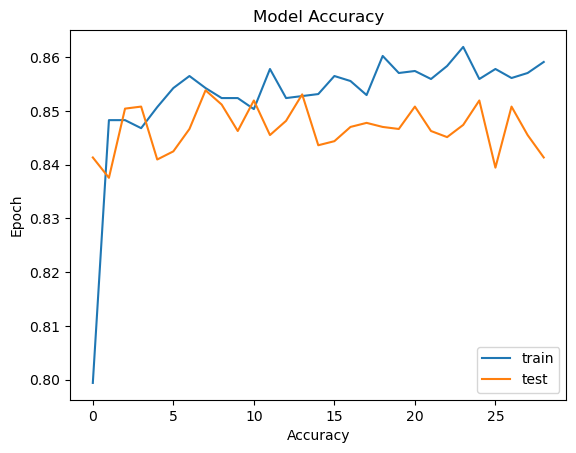

In [74]:
plt.plot(model_history2.history['accuracy'])
plt.plot(model_history2.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')

plt.legend(['train', 'test'], loc='lower right')
plt.show()

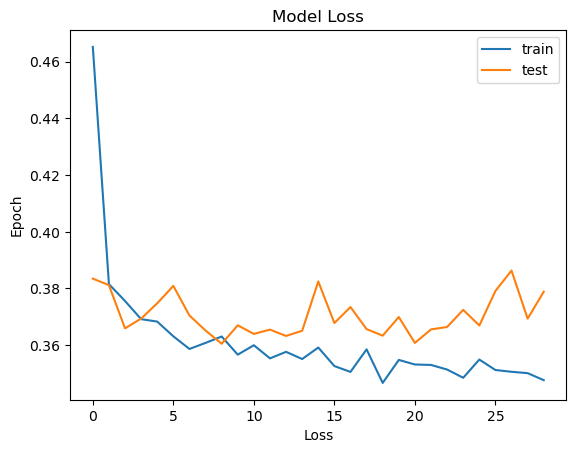

In [75]:
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')

plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [71]:
y_pred2 = ANN2.predict(X_test)
y_pred2 = (y_pred2 >= 0.5)
y_pred2

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [72]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[1531,   64],
       [ 210,  195]], dtype=int64)

In [73]:
score2 = accuracy_score(y_pred2, y_test)
score2

0.863